In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
data=pd.read_csv("phase2_output.csv")

In [2]:
data.shape

(59400, 21)

In [3]:
print(data['status_group'].value_counts())

0    32259
2    22824
1     4317
Name: status_group, dtype: int64


converted the target variable also into numerical

From the above dataset information, all the features are converted into numerical for modelling

In [4]:
data=data.drop(columns=['Unnamed: 0']) 

it is a serial number column after exporting data into CSV file

In [5]:
X=data.drop(columns=['status_group'])
y=data['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the data randomly Train data: 80% and test data: 20%

In [6]:
# creating summary datafframe to store all the metrics and information
summary= pd.DataFrame(columns=["Model",'Train data_F1 score','Test data_F1score'])

In [7]:
KN = KNeighborsClassifier(7) # no.of neighbours chosen are 7
#fitting the train data input variables and target variables
KN.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = KN.predict(X_train)
y_pred_test = KN.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
summary.loc[len(summary.index)] = ['K Nearest Neighbours',F1_train,F1_test] 

F1 Score:
TRAIN dataset : 0.75
TEST dataset  : 0.68


Choosing the K nearest Neighbours as a base line model. Choosing the F1 score as a evaluation metric for checking model performance.

In [8]:
#choosing the hyperparameters based on dataset
RF = RandomForestClassifier(n_estimators=50, random_state=42,
                            n_jobs=-1,class_weight='balanced',max_depth=15,max_features=15)
#fitting the train data input variables and target variables
RF.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = RF.predict(X_train)
# predicting the target varible from input variable of test data
y_pred_test = RF.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
summary.loc[len(summary.index)] = ['Randomforest',F1_train,F1_test] 

F1 Score:
TRAIN dataset : 0.87
TEST dataset  : 0.74


In [9]:
#choosing the hyperparameters based on dataset
DT = DecisionTreeClassifier(criterion = "gini",
            random_state = 200,max_depth=9, min_samples_leaf=1)
#fitting the train data input variables and target variables
DT.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = DT.predict(X_train)
# predicting the target varible from input variable of test data
y_pred_test = DT.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
summary.loc[len(summary.index)] = ['Decision Tree',F1_train,F1_test] 

F1 Score:
TRAIN dataset : 0.76
TEST dataset  : 0.74


# Ensembling of Models
It is combining various models for better performance. Ensembling methods used are:
1.Max. Voting
2.Xtreme Gradient Boosting
3.Gradient Boosting
4.Light GBM

In [10]:
# Max voting ensembling Decision Tree,KNN,Random forest models are choosed.
M2 = DecisionTreeClassifier(criterion = "gini",
            random_state = 200,max_depth=9, min_samples_leaf=1)
M3= KNeighborsClassifier(7)
M4= RandomForestClassifier(n_estimators=50, random_state=42,
                            n_jobs=-1,class_weight='balanced',max_depth=15,max_features=15)
model = VotingClassifier(estimators=[('dt', M2),('knn',M3),('rf',M4)], voting='hard')
model.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = model.predict(X_train)
# predicting the target varible from input variable of test data
y_pred_test = model.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
summary.loc[len(summary.index)] = ['MAx Voting ensemble',F1_train,F1_test] 

F1 Score:
TRAIN dataset : 0.82
TEST dataset  : 0.77


Using Max voting method and combinig all the four classfication models,F1_score of combined model is less than XGBoost model and better than KNN and Decision Tree model.

In [11]:
#choosing the hyperparameters based on dataset
XGB = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',num_class = 3,
                    eta = .1,max_depth = 10, colsample_bytree = .4, 
                    learning_rate = 0.1,max_delta_step=1)
#fitting the train data input variables and target variables
XGB.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = XGB.predict(X_train)
# predicting the target varible from input variable of test data
y_pred_test = XGB.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
summary.loc[len(summary.index)] = ['XGboost',F1_train,F1_test] 


F1 Score:
TRAIN dataset : 0.91
TEST dataset  : 0.79


In [12]:
#choosing the hyperparameters based on dataset
GBC=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
#fitting the train data input variables and target variables
GBC.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = GBC.predict(X_train)
# predicting the target varible from input variable of test data
y_pred_test = GBC.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
summary.loc[len(summary.index)] = ['Gradient boost',F1_train,F1_test] 

F1 Score:
TRAIN dataset : 0.77
TEST dataset  : 0.76


In [13]:
#choosing the hyperparameters based on dataset
LGBM = LGBMClassifier(max_depth = 10,colsample_bytree = .4,max_delta_step=1)
#fitting the train data input variables and target variables
LGBM.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = LGBM.predict(X_train)
# predicting the target varible from input variable of test data
y_pred_test = LGBM.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
summary.loc[len(summary.index)] = ['Light GBM',F1_train,F1_test] 

F1 Score:
TRAIN dataset : 0.79
TEST dataset  : 0.77


In [14]:
summary


,Model,Train data_F1 score,Test data_F1score
0,K Nearest Neighbours,0.75,0.68
1,Randomforest,0.87,0.74
2,Decision Tree,0.76,0.74
3,MAx Voting ensemble,0.82,0.77
4,XGboost,0.91,0.79
5,Gradient boost,0.77,0.76
6,Light GBM,0.79,0.77


Using the grid search best hyperparametes train_data F1_score of XGboost and Decision Tree are increased.Ensembling models Max voting and XGboost has better performance than the Decision Tree,KNN

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  int64  
 1   funder                 59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   basin                  59400 non-null  float64
 6   district_code          59400 non-null  int64  
 7   population             59400 non-null  int64  
 8   public_meeting         59400 non-null  float64
 9   scheme_name            59400 non-null  float64
 10  permit                 59400 non-null  float64
 11  construction_year      59400 non-null  int64  
 12  extraction_type_class  59400 non-null  float64
 13  management             59400 non-null  float64
 14  payment                59400 non-null  float64
 15  wa

# Feature importance and ranking 

<AxesSubplot:>

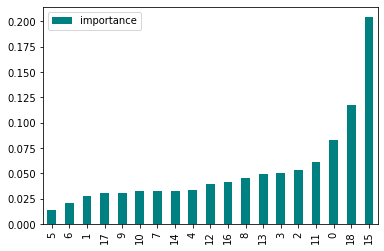

In [16]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
df=pd.DataFrame({"features":pd.DataFrame(X_train).columns,"importance":importances})
df.set_index('importance')
df=df.sort_values('importance')
df.plot.bar(color='teal')


Random forest Regressor are used for ranking the features.features are plotted in increasing order in the above bar graph with column numbers.Only high importance features are selected for improving the performance

In [17]:
X1=data.iloc[:,[12,16,8,13,3,2,11,0,18,15,4,14]] # selecting columns with highest importance
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=5)

In [18]:
KN = KNeighborsClassifier(7) # no.of neighbours chosen are 7
#fitting the train data input variables and target variables
KN.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = KN.predict(X_train)
y_pred_test = KN.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)


F1 Score:
TRAIN dataset : 0.87
TEST dataset  : 0.83


Principal Component Analysis: Before performing PCA columns has to be standardized

In [30]:
stand = StandardScaler()
train_stand=pd.DataFrame(stand.fit_transform(X), columns=X.columns)
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(train_stand))
variance=pca.explained_variance_ratio_
print(variance)


[0.15521992 0.09066279 0.07652954 0.06899559 0.06054707 0.0573942
 0.05459937 0.0531538  0.05004407 0.04777098 0.04166218 0.03970039
 0.0376842  0.03466481 0.03316739 0.02975927 0.02587459 0.02426323
 0.01830658]


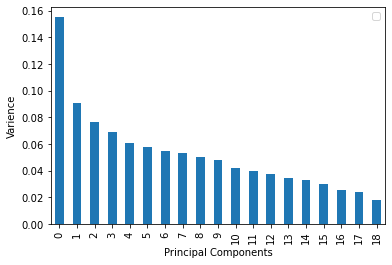

In [31]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Varience');

Selecting the top 12 principal components with max variance

In [32]:
pca = PCA(n_components=12) # selecting 12 principal components
X_new = pca.fit_transform(df_pca)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=5)


In [33]:
KN = KNeighborsClassifier(7) # no.of neighbours chosen are 7
#fitting the train data input variables and target variables
KN.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = KN.predict(X_train)
y_pred_test = KN.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)

F1 Score:
TRAIN dataset : 0.79
TEST dataset  : 0.74
